Investigate correlations between our predictors and labels

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
from scipy.stats import pearsonr

In [2]:

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

In [3]:
file_suffix='mar9'

with open('../OtherData/CombinedDFAdjPopulationExcessMobility_%s.pkl' % (file_suffix), 'rb') as handle:
    combined2 = pickle.load(handle)

In [4]:
combined2.columns

Index(['Date', 'Region', 'Imported Cases', 'Internal Movement',
       'Excess Imported Cases', 'Excess Internal Movement',
       'Diff Imported Cases', 'Diff Internal Movement', 'Prevalence',
       'accumulated_cases', 'accumulated_recoveries', 'accumulated_tested',
       'active_cases', 'population', 'median age', 'weighted_mean_poverty',
       'prevalence', 'new_cases', 'new_tests', 'positivity_rate',
       'Imported Cases_Adj100k', 'Internal Movement_Adj100k',
       'Excess Imported Cases_Adj100k', 'Excess Internal Movement_Adj100k',
       'Diff Imported Cases_Adj100k', 'Diff Internal Movement_Adj100k',
       'active_cases_Adj100k', 'new_cases_Adj100k', 'new_tests_Adj100k',
       'Active_Cases_7_Adj100k', 'New_Cases_7_Adj100k', 'New_Tests_7_Adj100k',
       'Positivity_Rate_7', 'Excess Imported_Cases_7_Adj100k',
       'Diff Imported_Cases_7_Adj100k', 'Excess Internal_Movement_7_Adj100k',
       'Diff Internal_Movement_7_Adj100k', 'Pressure_7_Adj100k',
       'Pressure_8_A

In [5]:
a = list(combined2.columns)

a.sort()

In [6]:
activecases_lag = ['Active_Cases_7_Adj100k_7_1dayago',
 'Active_Cases_7_Adj100k_7_2dayago',
 'Active_Cases_7_Adj100k_7_3dayago',
 'Active_Cases_7_Adj100k_7_4dayago',
 'Active_Cases_7_Adj100k_7_5dayago',
 'Active_Cases_7_Adj100k_7_6dayago']

activecases_label = ['Active_Cases_7_Adj100k_next7days']

newcases_lag = ['New_Cases_7_Adj100k_1dayago', 'New_Cases_7_Adj100k_2dayago', 'New_Cases_7_Adj100k_3dayago',
'New_Cases_7_Adj100k_4dayago', 'New_Cases_7_Adj100k_5dayago', 'New_Cases_7_Adj100k_6dayago']

newcases_label = ['NewCases_7_Adj100k_next7days']
newcases_map = ['NewCases_7_Adj100k_next7days', 'New_Cases_7_Adj100k_1dayago']

newtests_lag = ['New_Tests_7_Adj100k_1dayago', 'New_Tests_7_Adj100k_2dayago',
'New_Tests_7_Adj100k_3dayago', 'New_Tests_7_Adj100k_4dayago', 'New_Tests_7_Adj100k_5dayago',
'New_Tests_7_Adj100k_6dayago']

newtests_label = ['NewTests_7_Adj100k_next7days']

poverty = ['weighted_mean_poverty', 'median age']

positivity_lag = ['Positivity_Rate_7_1dayago',
'Positivity_Rate_7_2dayago', 'Positivity_Rate_7_3dayago',
'Positivity_Rate_7_4dayago', 'Positivity_Rate_7_5dayago',
'Positivity_Rate_7_6dayago']

positivity_label = ['Positivity_Rate_7_next7days']

pressure = ['Pressure_7_Adj100k_1dayago', 'Diff Pressure_7_Adj100k_1dayago', 'Excess Pressure_7_Adj100k_1dayago']
internal_movement = ['Internal_Movement_7_Adj100k_1dayago', 'Diff Internal_Movement_7_Adj100k_1dayago', 'Excess Internal_Movement_7_Adj100k_1dayago']

to_test_correlation = activecases_lag + newcases_lag + newtests_lag + positivity_lag + poverty + pressure + internal_movement + activecases_label + newcases_label + positivity_label

In [7]:
c = combined2
df = c.reindex(sorted(c.columns), axis=1)

In [8]:
df_real_mobility_data = df.where(df["Date"] >= '2020-11-30').dropna()

In [9]:
df_relabeled = df.rename(columns={'NewCases_7_Adj100k_next7days': 'Next Week New Cases',
                          'New_Cases_7_Adj100k_1dayago': 'Last Week New Cases',
                                      'Positivity_Rate_7_next7days': 'Next Week Test Pos Rate',
                          'Positivity_Rate_7_1dayago': 'Last Week Test Pos Rate',
                          'weighted_mean_poverty': 'Socioeconomic Score',
                          'median age': 'Median Age',
                          'Pressure_7_Adj100k_1dayago': 'Pressure Score',
                          'Diff Pressure_7_Adj100k_1dayago': 'Diffed Pressure Score',
                          'Excess Pressure_7_Adj100k_1dayago': 'Excess Pressure Score',
                          'Internal_Movement_7_Adj100k_1dayago': 'IM Score',
                          'Diff Internal_Movement_7_Adj100k_1dayago': 'Diffed IM Score',
                          'Excess Internal_Movement_7_Adj100k_1dayago': 'Excess IM Score'})

df_rmd_relabeled = df_real_mobility_data.rename(columns={'NewCases_7_Adj100k_next7days': 'Next Week New Cases',
                          'New_Cases_7_Adj100k_1dayago': 'Last Week New Cases',
                                      'Positivity_Rate_7_next7days': 'Next Week Test Pos Rate',
                          'Positivity_Rate_7_1dayago': 'Last Week Test Pos Rate',
                          'weighted_mean_poverty': 'Socioeconomic Score',
                          'median age': 'Median Age',
                          'Pressure_7_Adj100k_1dayago': 'Pressure Score',
                          'Diff Pressure_7_Adj100k_1dayago': 'Diffed Pressure Score',
                          'Excess Pressure_7_Adj100k_1dayago': 'Excess Pressure Score',
                          'Internal_Movement_7_Adj100k_1dayago': 'IM Score',
                          'Diff Internal_Movement_7_Adj100k_1dayago': 'Diffed IM Score',
                          'Excess Internal_Movement_7_Adj100k_1dayago': 'Excess IM Score'})

In [10]:
plot_newcases = ['Next Week New Cases',
                    'Last Week New Cases',
                    'Socioeconomic Score',
                    'Median Age',
                    'Pressure Score',
                    'Diffed Pressure Score',
                    'Excess Pressure Score',
                    'IM Score',
                    'Diffed IM Score',
                    'Excess IM Score']

plot_presentation_newcases = ['Next Week New Cases',
                    'Last Week New Cases',
                              'Socioeconomic Score',
                    'Median Age',
                    'Pressure Score',
                    'IM Score']


plot_posrate = ['Next Week Test Pos Rate',
                    'Last Week Test Pos Rate',
                    'Socioeconomic Score',
                    'Median Age',
                    'Pressure Score',
                    'Diffed Pressure Score',
                    'Excess Pressure Score',
                    'IM Score',
                    'Diffed IM Score',
                    'Excess IM Score']

In [11]:
def new_heatmap(df, labels):
    corr = df[labels].corr(method='pearson')
    mask = np.tril(np.ones_like(corr, dtype=bool), k=-1)
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(20, 210, s=95, l=60, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True, fmt=".2f")

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

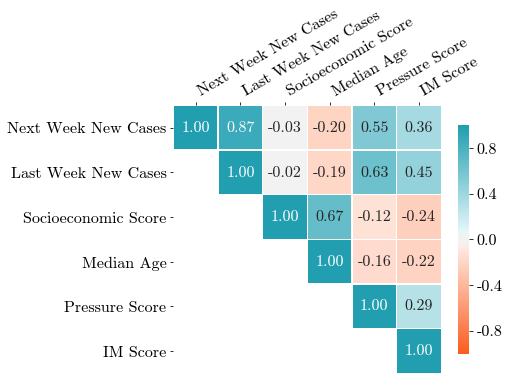

In [12]:

corr = df_relabeled[plot_presentation_newcases].corr(method='pearson')
mask = np.tril(np.ones_like(corr, dtype=bool), k=-1)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 210, s=95, l=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True, fmt=".2f")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=30, ha='left')

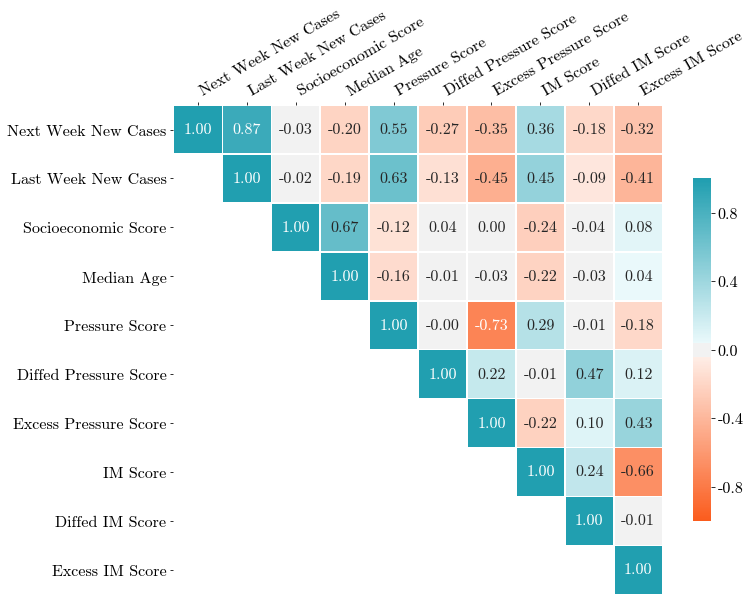

In [13]:
new_heatmap(df_relabeled, plot_newcases)

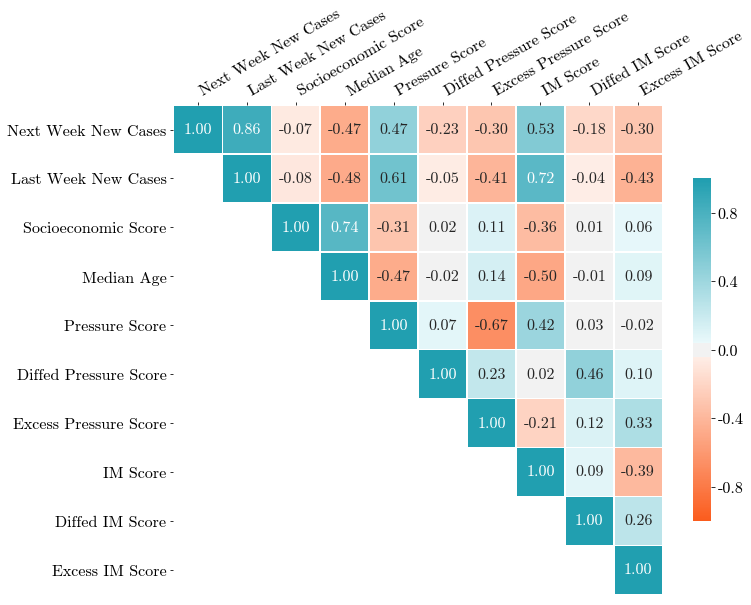

In [14]:
new_heatmap(df_rmd_relabeled, plot_newcases)

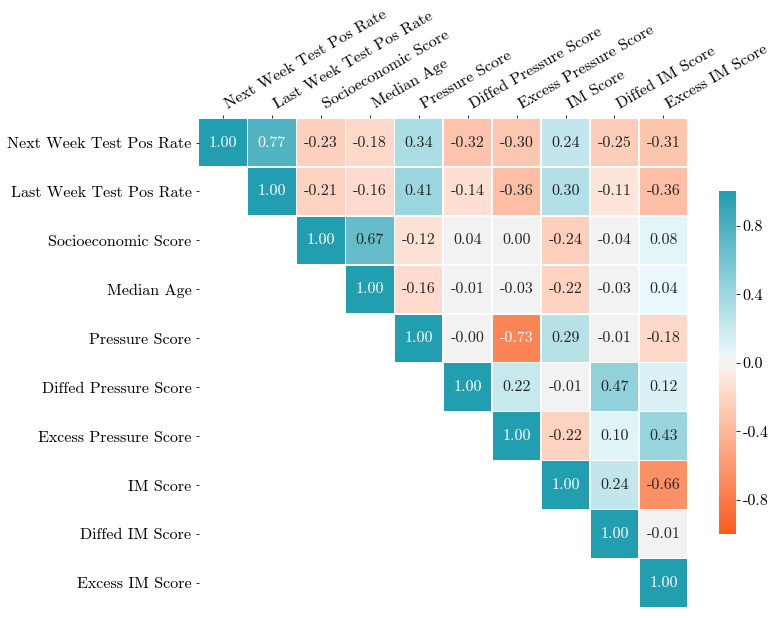

In [15]:
new_heatmap(df_relabeled, plot_posrate)

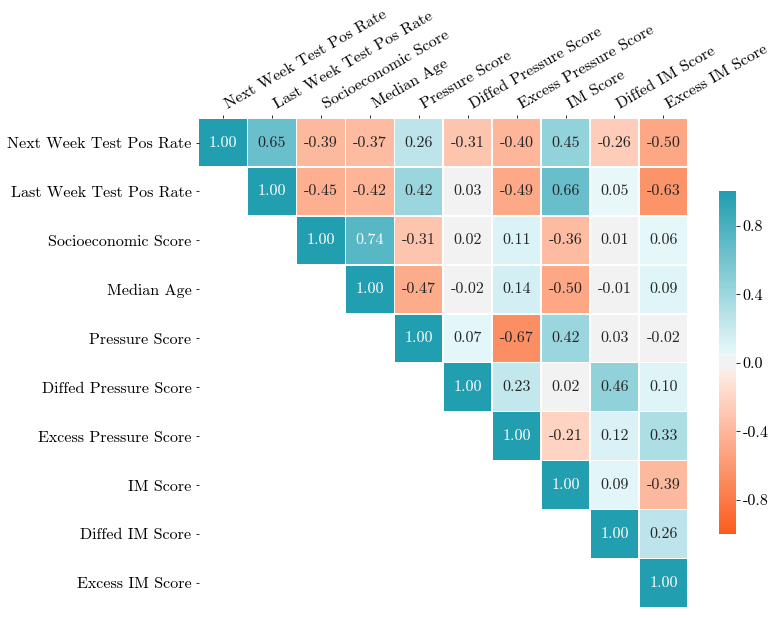

In [16]:
new_heatmap(df_rmd_relabeled, plot_posrate)

In [17]:
def plot_corr_matrix(df, labels, title):
    corr_1 = df[labels]

    plt.figure(figsize = (10, 8))
    sns.heatmap(corr_1.corr(), cmap="RdYlGn", vmin=-1, vmax=1)
    plt.suptitle(title)
    plt.show()

In [18]:
def make_correlation_df(without_fake, with_fake, label):
    corr_df = pd.DataFrame(columns=['First_Col', 'Second_Col', 'r (real data only)', 'r (fake mobility data)'])
    first_column = label
    test_df = without_fake.where(without_fake[first_column] > 0).dropna()
    test_df_2 = with_fake.where(with_fake[first_column] > 0).dropna()
    for second_column in to_test_correlation:
        corr, _ = pearsonr(test_df[first_column], test_df[second_column])
        corr_2, _ = pearsonr(test_df_2[first_column], test_df_2[second_column])
        corr_df = corr_df.append({'First_Col': first_column,
                                     'Second_Col': second_column,
                                  'r (real data only)': corr,
                                 'r (fake mobility data)': corr_2}, ignore_index=True)
    return corr_df

# Correlation between mobility features and active cases

The figure "Correlation between Incidence Lag and Mobility Features on Next Week's Active Cases" shows that moving average stops features are more highly correlated with active cases in the next 7 days than daily stops features. Poverty is not correlated with active cases in the next 7 days.

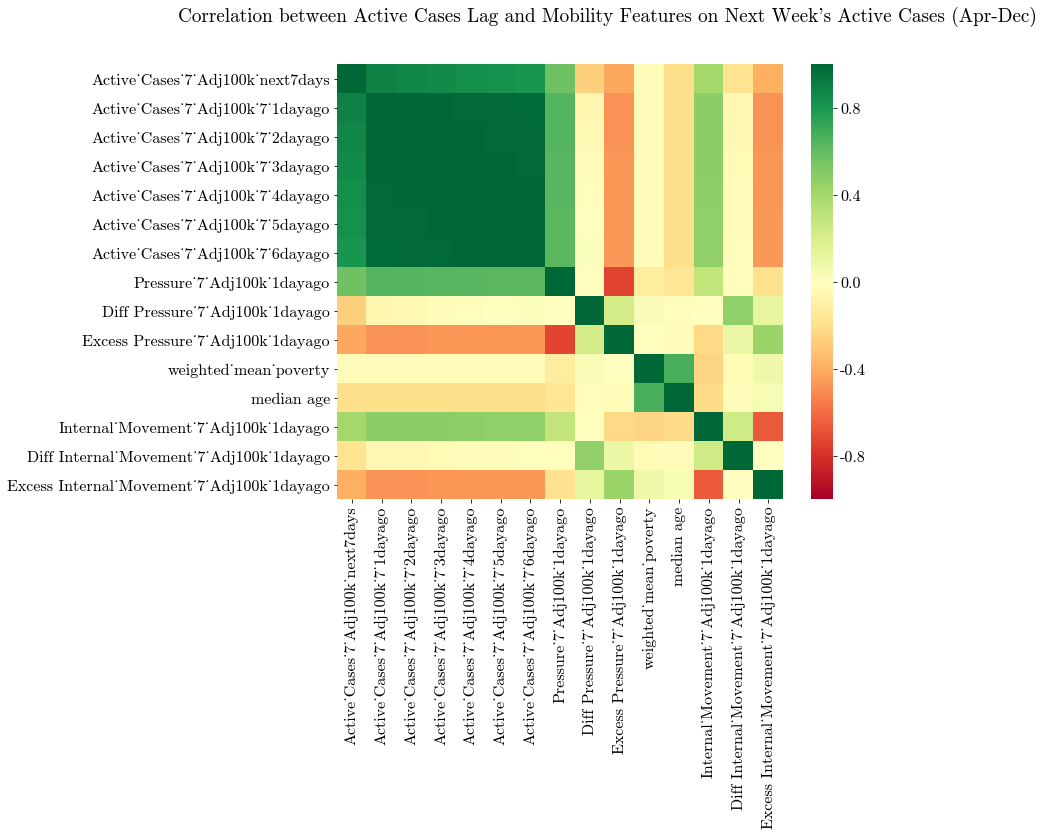

In [19]:
labels = activecases_label + activecases_lag + pressure + poverty + internal_movement
title = "Correlation between Active Cases Lag and Mobility Features on Next Week's Active Cases (Apr-Dec)"

plot_corr_matrix(df, labels, title)

Showing with only real mobility data:

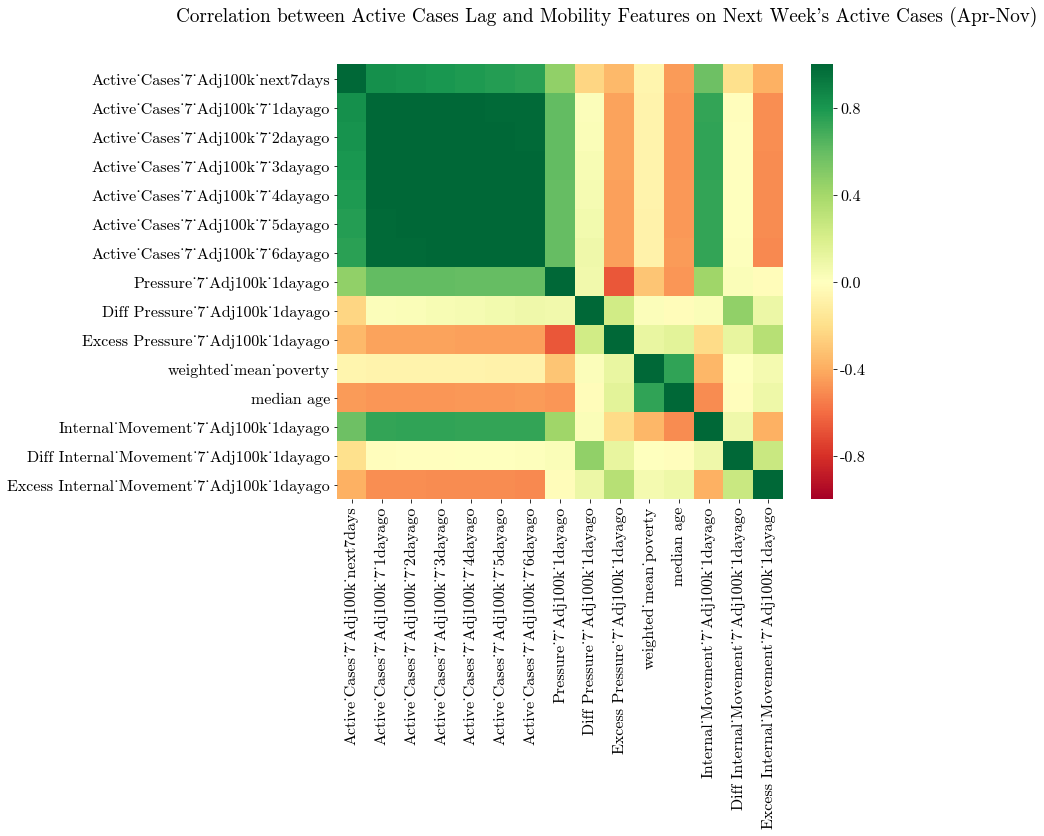

In [20]:
labels = activecases_label + activecases_lag + pressure + poverty + internal_movement
title = "Correlation between Active Cases Lag and Mobility Features on Next Week's Active Cases (Apr-Nov)"

plot_corr_matrix(df_real_mobility_data, labels, title)

Showing only the features with good correlation:

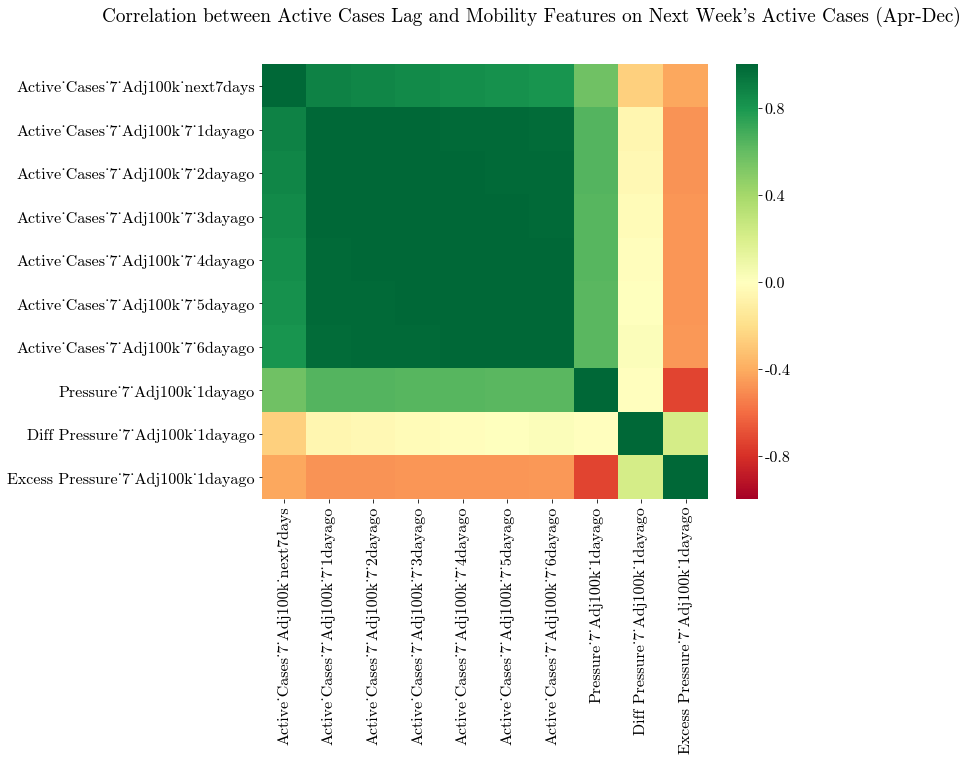

In [21]:
labels = activecases_label + activecases_lag + pressure
title = "Correlation between Active Cases Lag and Mobility Features on Next Week's Active Cases (Apr-Dec)"

plot_corr_matrix(df, labels, title)

In [22]:
results = make_correlation_df(without_fake=c,
                              with_fake=df_real_mobility_data,
                              label="Active_Cases_7_Adj100k_next7days")

In [23]:
results.sort_values('r (real data only)', ascending=False)

,First_Col,Second_Col,r (real data only),r (fake mobility data)
32,Active_Cases_7_Adj100k_next7days,Active_Cases_7_Adj100k_next7days,1.000000,1.000000
6,Active_Cases_7_Adj100k_next7days,New_Cases_7_Adj100k_1dayago,0.970118,0.985258
7,Active_Cases_7_Adj100k_next7days,New_Cases_7_Adj100k_2dayago,0.963536,0.979257
33,Active_Cases_7_Adj100k_next7days,NewCases_7_Adj100k_next7days,0.958864,0.978706
8,Active_Cases_7_Adj100k_next7days,New_Cases_7_Adj100k_3dayago,0.955426,0.971982
0,Active_Cases_7_Adj100k_next7days,Active_Cases_7_Adj100k_7_1dayago,0.951251,0.961089
9,Active_Cases_7_Adj100k_next7days,New_Cases_7_Adj100k_4dayago,0.945931,0.963527
1,Active_Cases_7_Adj100k_next7days,Active_Cases_7_Adj100k_7_2dayago,0.939359,0.951730
10,Active_Cases_7_Adj100k_next7days,New_Cases_7_Adj100k_5dayago,0.935158,0.954002
2,Active_Cases_7_Adj100k_next7days,Active_Cases_7_Adj100k_7_3dayago,0.926555,0.941598


# Correlations between mobility data and new cases/100k

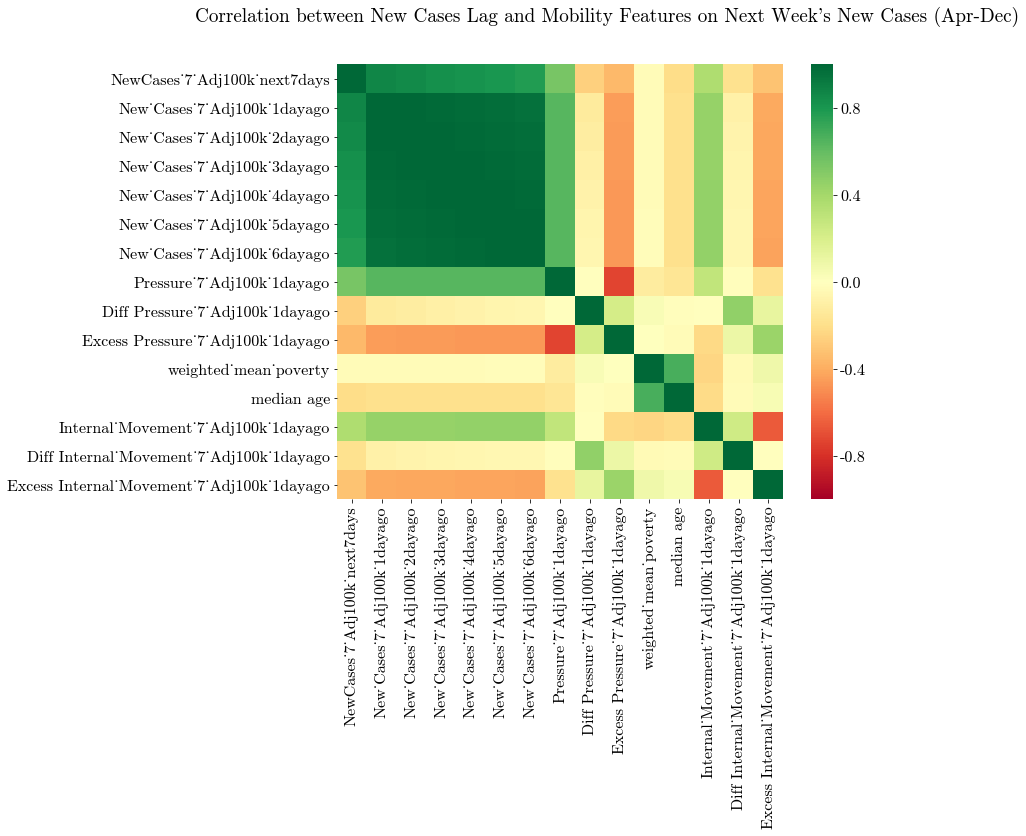

In [24]:
labels = newcases_label + newcases_lag + pressure + poverty + internal_movement
title = "Correlation between New Cases Lag and Mobility Features on Next Week's New Cases (Apr-Dec)"

plot_corr_matrix(df, labels, title)

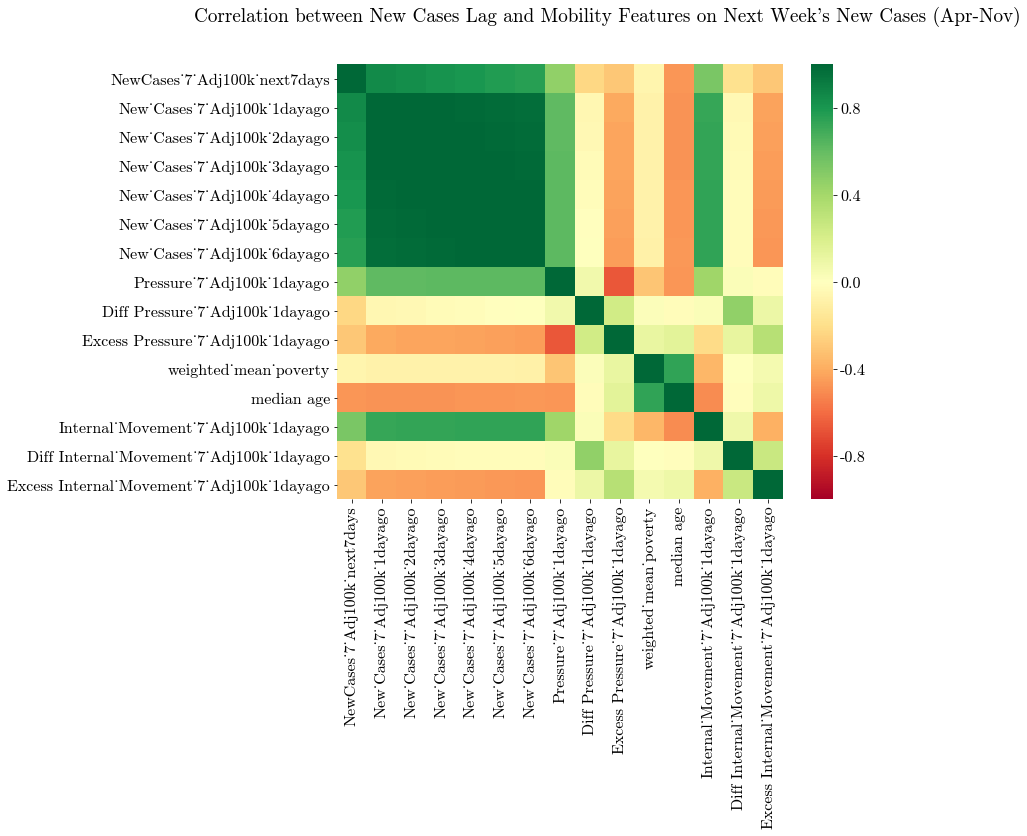

In [25]:
labels = newcases_label + newcases_lag + pressure + poverty + internal_movement
title = "Correlation between New Cases Lag and Mobility Features on Next Week's New Cases (Apr-Nov)"

plot_corr_matrix(df_real_mobility_data, labels, title)

In [26]:
results = make_correlation_df(without_fake=c,
                              with_fake=df_real_mobility_data,
                              label="NewCases_7_Adj100k_next7days")

results.sort_values('r (real data only)', ascending=False)

,First_Col,Second_Col,r (real data only),r (fake mobility data)
33,NewCases_7_Adj100k_next7days,NewCases_7_Adj100k_next7days,1.000000,1.000000
32,NewCases_7_Adj100k_next7days,Active_Cases_7_Adj100k_next7days,0.958250,0.978706
6,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_1dayago,0.914809,0.940181
7,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_2dayago,0.899985,0.927984
8,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_3dayago,0.883941,0.914457
9,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_4dayago,0.866664,0.900220
10,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_5dayago,0.848209,0.885239
0,NewCases_7_Adj100k_next7days,Active_Cases_7_Adj100k_7_1dayago,0.847946,0.891681
1,NewCases_7_Adj100k_next7days,Active_Cases_7_Adj100k_7_2dayago,0.830223,0.877459
11,NewCases_7_Adj100k_next7days,New_Cases_7_Adj100k_6dayago,0.829024,0.869599


# Same thing, for positivity rate.

We see almost no correlation with mobility data, but moderate correlation with poverty rate.

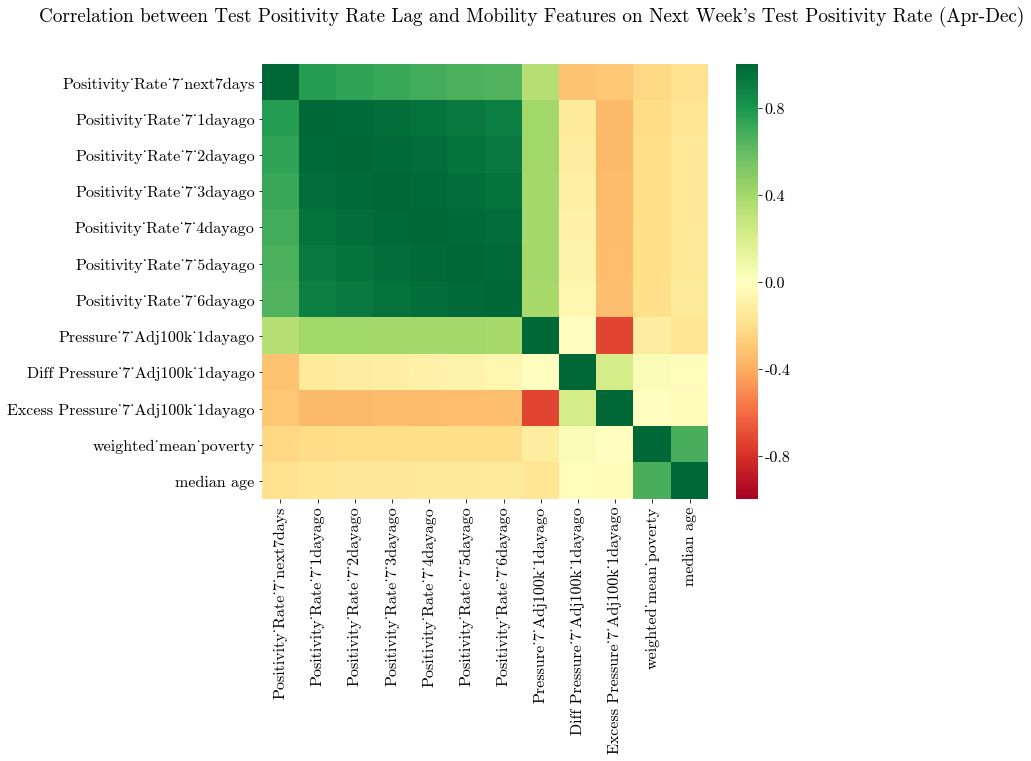

In [27]:
labels = positivity_label + positivity_lag + pressure + poverty
title = "Correlation between Test Positivity Rate Lag and Mobility Features on Next Week's Test Positivity Rate (Apr-Dec)"

plot_corr_matrix(df, labels, title)

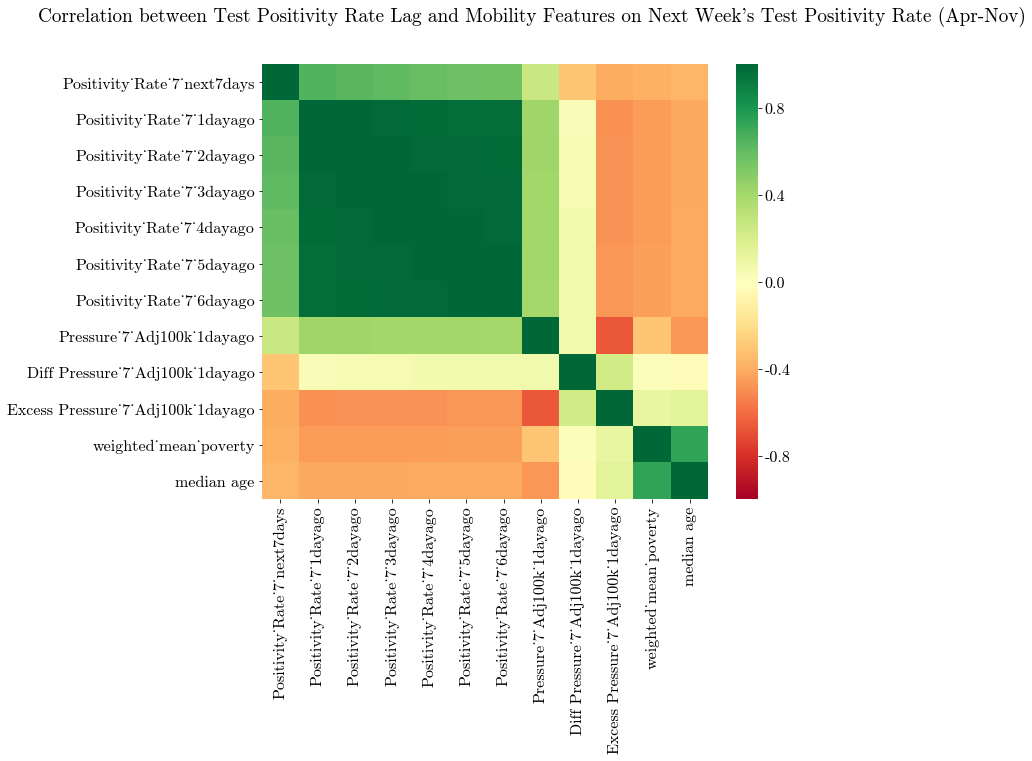

In [28]:
labels = positivity_label + positivity_lag + pressure + poverty
title = "Correlation between Test Positivity Rate Lag and Mobility Features on Next Week's Test Positivity Rate (Apr-Nov)"

plot_corr_matrix(df_real_mobility_data, labels, title)

In [29]:
results = make_correlation_df(without_fake=c,
                              with_fake=df_real_mobility_data,
                              label="Positivity_Rate_7_next7days")

results.sort_values('r (real data only)', ascending=False)

,First_Col,Second_Col,r (real data only),r (fake mobility data)
34,Positivity_Rate_7_next7days,Positivity_Rate_7_next7days,1.000000,1.000000
18,Positivity_Rate_7_next7days,Positivity_Rate_7_1dayago,0.800200,0.944233
19,Positivity_Rate_7_next7days,Positivity_Rate_7_2dayago,0.776156,0.939004
20,Positivity_Rate_7_next7days,Positivity_Rate_7_3dayago,0.751483,0.933898
21,Positivity_Rate_7_next7days,Positivity_Rate_7_4dayago,0.726758,0.928565
22,Positivity_Rate_7_next7days,Positivity_Rate_7_5dayago,0.702015,0.922613
23,Positivity_Rate_7_next7days,Positivity_Rate_7_6dayago,0.678042,0.916045
32,Positivity_Rate_7_next7days,Active_Cases_7_Adj100k_next7days,0.566561,0.627726
33,Positivity_Rate_7_next7days,NewCases_7_Adj100k_next7days,0.563293,0.580172
6,Positivity_Rate_7_next7days,New_Cases_7_Adj100k_1dayago,0.541529,0.639414


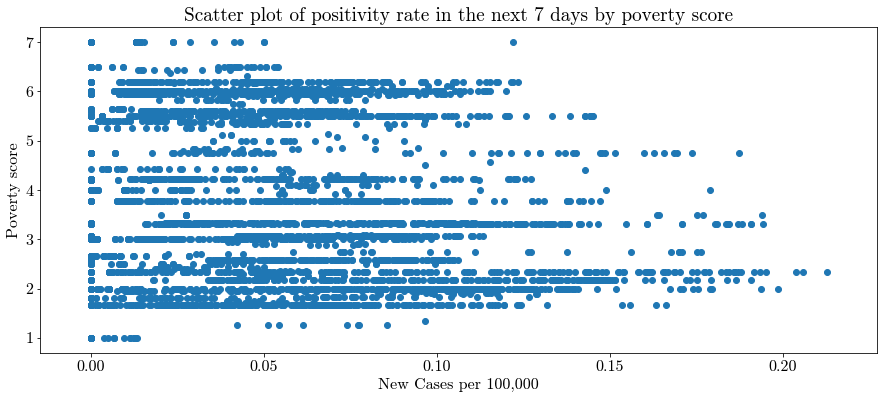

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(c["Positivity_Rate_7_next7days"], c["weighted_mean_poverty"])
plt.title("Scatter plot of positivity rate in the next 7 days by poverty score")
plt.xlabel("New Cases per 100,000")
plt.ylabel("Poverty score")
plt.show()

# Same thing for new tests/100k.

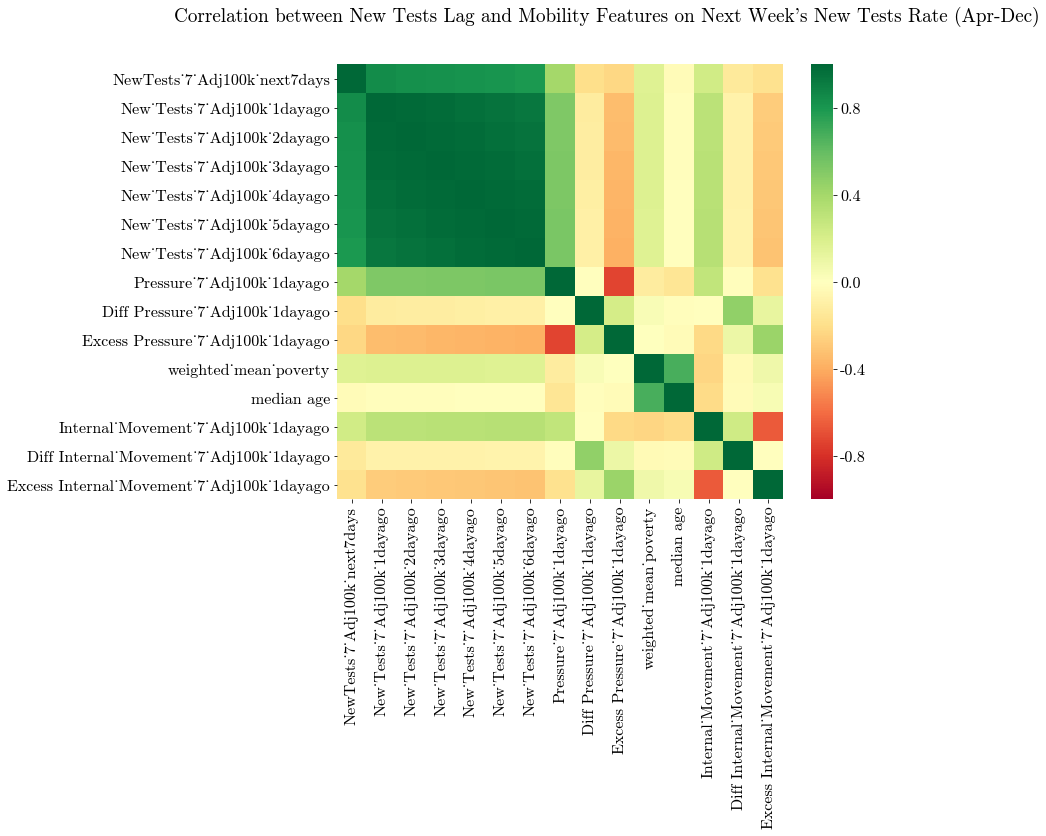

In [31]:
labels = newtests_label + newtests_lag + pressure + poverty + internal_movement
title = "Correlation between New Tests Lag and Mobility Features on Next Week's New Tests Rate (Apr-Dec)"

plot_corr_matrix(df, labels, title)

In [32]:
results = make_correlation_df(without_fake=c,
                              with_fake=df_real_mobility_data,
                              label="NewTests_7_Adj100k_next7days")

results.sort_values('r (real data only)', ascending=False)

,First_Col,Second_Col,r (real data only),r (fake mobility data)
12,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_1dayago,0.888054,0.939182
13,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_2dayago,0.879430,0.927736
14,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_3dayago,0.870124,0.915596
15,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_4dayago,0.860591,0.902966
16,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_5dayago,0.850458,0.889621
17,NewTests_7_Adj100k_next7days,New_Tests_7_Adj100k_6dayago,0.840249,0.875783
33,NewTests_7_Adj100k_next7days,NewCases_7_Adj100k_next7days,0.823637,0.811602
32,NewTests_7_Adj100k_next7days,Active_Cases_7_Adj100k_next7days,0.768582,0.748271
6,NewTests_7_Adj100k_next7days,New_Cases_7_Adj100k_1dayago,0.700662,0.668388
7,NewTests_7_Adj100k_next7days,New_Cases_7_Adj100k_2dayago,0.685839,0.649223
